In [3]:
import pandas as pd
import json

In [6]:
# File paths (Update if in subfolders)
tfidf_file = "/content/drive/MyDrive/sem 6/DS lab/Data/output_tf-idf.json"
linguistic_file = "/content/drive/MyDrive/sem 6/DS lab/Data/VADER/VADER_df_norm.json"

# Load TF-IDF features
with open(tfidf_file, "r") as f:
    tfidf_data = json.load(f)
df_tfidf = pd.DataFrame(tfidf_data)

# Load Linguistic & Sentiment features
with open(linguistic_file, "r") as f:
    linguistic_data = json.load(f)
df_linguistic = pd.DataFrame(linguistic_data)

# Ensure both datasets have 'Label' (not 'label')
if 'Label' not in df_tfidf.columns or 'Label' not in df_linguistic.columns:
    raise ValueError("Ensure both datasets contain a 'Label' column.")

# Convert to NumPy arrays for model training
X_tfidf, y_tfidf = df_tfidf.drop(columns=["Label"]).values, df_tfidf["Label"].values
X_linguistic, y_linguistic = df_linguistic.drop(columns=["Label"]).values, df_linguistic["Label"].values



## Data splitting

In [7]:
from sklearn.model_selection import train_test_split

# Split TF-IDF dataset
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(
    X_tfidf, y_tfidf, test_size=0.2, random_state=42, stratify=y_tfidf
)

# Split Linguistic dataset
X_linguistic_train, X_linguistic_test, y_linguistic_train, y_linguistic_test = train_test_split(
    X_linguistic, y_linguistic, test_size=0.2, random_state=42, stratify=y_linguistic
)


## Train and evaluate models

In [8]:
!pip install xgboost

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

# Store results
results = {}

for dataset_name, (X_train, X_test, y_train, y_test) in {
    "TF-IDF": (X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test),
    "Linguistic & Sentiment": (X_linguistic_train, X_linguistic_test, y_linguistic_train, y_linguistic_test)
}.items():

    print(f"\n--- Training on {dataset_name} Dataset ---")
    results[dataset_name] = {}

    for model_name, model in models.items():
        print(f"\nTraining {model_name} on {dataset_name} dataset...")

        # Train model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluate
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        print(f"\n{model_name} Performance on {dataset_name} dataset:")
        print("Accuracy:", acc)
        print("Classification Report:\n", report)
        print("-" * 50)

        # Store results
        results[dataset_name][model_name] = acc


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 5.3 MB/s eta 0:00:00

--- Training on TF-IDF Dataset ---

Training Logistic Regression on TF-IDF dataset...

Logistic Regression Performance on TF-IDF dataset:
Accuracy: 0.5345238095238095
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.29      0.39      2100
           1       0.52      0.78      0.63      2100

    accuracy                           0.53      4200
   macro avg       0.55      0.53      0.51      4200
weighted avg       0.55      0.53      0.51      4200

--------------------------------------------------

Training Random Forest on TF-IDF dataset...

Random Forest Performance on TF-IDF dataset:
Accuracy: 0.518095238095238
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.09      0.16      2100
           1      

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Random Forest Performance on Linguistic & Sentiment dataset:
Accuracy: 0.6309523809523809
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.68      0.65      2100
           1       0.65      0.58      0.61      2100

    accuracy                           0.63      4200
   macro avg       0.63      0.63      0.63      4200
weighted avg       0.63      0.63      0.63      4200

--------------------------------------------------

Training XGBoost on Linguistic & Sentiment dataset...

XGBoost Performance on Linguistic & Sentiment dataset:
Accuracy: 0.6307142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.66      0.64      2100
           1       0.64      0.60      0.62      2100

    accuracy                           0.63      4200
   macro avg       0.63      0.63      0.63      4200
weighted avg       0.63      0.63      0.63      4200

----------------

## Compare model performance

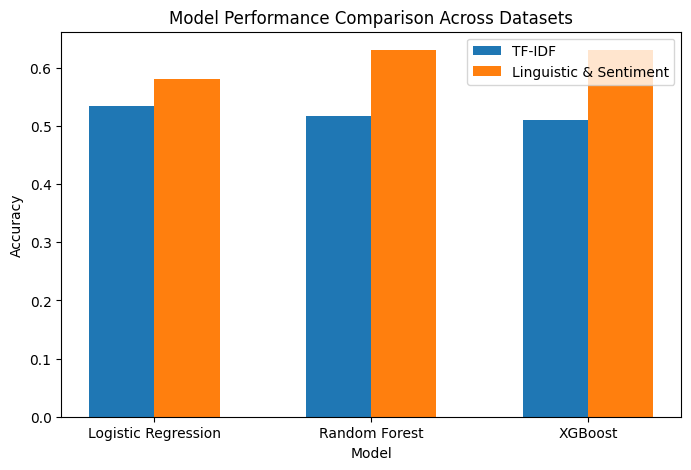

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Convert results to a structured format
datasets = list(results.keys())
model_names = list(models.keys())

# Prepare accuracy matrix
accuracy_matrix = np.array([[results[dataset][model] for model in model_names] for dataset in datasets])

# Plot results
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.3
index = np.arange(len(model_names))

for i, dataset in enumerate(datasets):
    plt.bar(index + i * bar_width, accuracy_matrix[i], width=bar_width, label=dataset)

ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.set_title("Model Performance Comparison Across Datasets")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()
